In [2]:
# Set up
import pandas as pd
import seaborn as sns
from numpy import argmax
import numpy as np

# plot
import matplotlib.pyplot as plt
%matplotlib inline
import plotly as py
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)


# algorithm
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Machine Learning
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression


# split data
from sklearn.cross_validation import train_test_split




# Import data
major = pd.read_csv('./data/degrees-that-pay-back.csv')
college_type = pd.read_csv('./data/salaries-by-college-type.csv')
college_region = pd.read_csv('./data/salaries-by-region.csv')
college_ranking = pd.read_csv('./data/national-universities-rankings.csv')

/Users/zhiqilin/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning:

This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.



## Dataset Overview

In [3]:
# Understand the dataset 
college_type.describe()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,269,269,269,269,231,269,269,231
unique,249,5,145,168,141,178,110,98
top,"University of California, Santa Barbara (UCSB)",State,"$42,600.00","$72,100.00","$40,100.00","$54,100.00","$106,000.00","$150,000.00"
freq,2,175,7,5,6,6,11,8


In [4]:
# Understand the dataset 
college_region.describe()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,320,320,320,320,273,320,320,273
unique,320,5,168,204,166,217,130,115
top,Boston University,Northeastern,"$42,600.00","$110,000.00","$43,300.00","$67,400.00","$106,000.00","$150,000.00"
freq,1,100,6,5,5,5,10,10


In [5]:
# Understand the dataset 
college_ranking.describe()

,rank,undergrad_enrollment
count,231.000000,231.000000
mean,113.982684,14946.619048
std,65.995518,10569.664095
min,1.000000,1001.000000
25%,56.000000,6238.500000
50%,111.000000,12949.000000
75%,171.000000,22145.500000
max,220.000000,54513.000000


As we can see above, the number of schools are varies in different data set. For the college type dataset, when a college is with more than 1 type, there will more than 1 row to present the college type. Here are all the colleges that are with multiple types:

In [6]:
# the school with the duplicated types
college_type['is_duplicated'] = college_type.duplicated(["School Name"])
college_type_dup = college_type.loc[college_type['is_duplicated'] == True]
college_type_dup.describe()

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,is_duplicated
count,20,20,20,20,19,20,20,19,20
unique,20,2,20,19,19,19,14,18,1
top,University of Texas (UT) - Austin,State,"$46,900.00","$95,000.00","$36,600.00","$52,800.00","$106,000.00","$163,000.00",True
freq,1,19,1,2,1,2,3,2,20


In [7]:
college_region.describe()

,School Name,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
count,320,320,320,320,273,320,320,273
unique,320,5,168,204,166,217,130,115
top,Boston University,Northeastern,"$42,600.00","$110,000.00","$43,300.00","$67,400.00","$106,000.00","$150,000.00"
freq,1,100,6,5,5,5,10,10


In [8]:
college_ranking.describe()

,rank,undergrad_enrollment
count,231.000000,231.000000
mean,113.982684,14946.619048
std,65.995518,10569.664095
min,1.000000,1001.000000
25%,56.000000,6238.500000
50%,111.000000,12949.000000
75%,171.000000,22145.500000
max,220.000000,54513.000000


# Merge

In [9]:
school_type = college_type[['School Name', 'School Type']]
all_info = pd.merge(school_type, college_region, on=['School Name', 'School Name'])

In [10]:
# all_info = pd.merge(school_type, college_region, how='outer', left_on=['School Name'], right_on = ['School Name'])
all_info['School Name'] = all_info['School Name'].str.replace(r"\((.*?)\)","").str.rstrip()
# all_info = all_info.merge(college_ranking, how='outer', left_on='School Name', right_on = 'name')
all_info = all_info.merge(college_ranking, how='outer', left_on='School Name', right_on = 'name')
all_info = all_info.loc[all_info['School Name'].notna()]
all_info

,School Name,School Type,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,name,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,Massachusetts Institute of Technology,Engineering,Northeastern,"$72,200.00","$126,000.00","$76,800.00","$99,200.00","$168,000.00","$220,000.00",Massachusetts Institute of Technology,"Cambridge, MA",7.0,"MIT is located in Cambridge, Massachusetts, ac...","$48,452",NaN,4527.0
1,California Institute of Technology,Engineering,California,"$75,500.00","$123,000.00",NaN,"$104,000.00","$161,000.00",NaN,California Institute of Technology,"Pasadena, CA",12.0,"Caltech, which focuses on science and engineer...","$47,577",NaN,1001.0
2,Harvey Mudd College,Engineering,California,"$71,800.00","$122,000.00",NaN,"$96,000.00","$180,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,Northeastern,"$62,400.00","$114,000.00","$66,800.00","$94,300.00","$143,000.00","$190,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cooper Union,Engineering,Northeastern,"$62,200.00","$114,000.00",NaN,"$80,200.00","$142,000.00",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Worcester Polytechnic Institute,Engineering,Northeastern,"$61,000.00","$114,000.00","$80,000.00","$91,200.00","$137,000.00","$180,000.00",Worcester Polytechnic Institute,"Worcester, MA",60.0,"Among the 10 colleges located in Worcester, Ma...","$46,994",NaN,4299.0
6,Carnegie Mellon University,Engineering,Northeastern,"$61,800.00","$111,000.00","$63,300.00","$80,100.00","$150,000.00","$209,000.00",Carnegie Mellon University,"Pittsburgh, PA",24.0,"Carnegie Mellon University, founded by industr...","$52,040",NaN,6454.0
7,Rensselaer Polytechnic Institute,Engineering,Northeastern,"$61,100.00","$110,000.00","$71,600.00","$85,500.00","$140,000.00","$182,000.00",Rensselaer Polytechnic Institute,"Troy, NY",39.0,Rensselaer Polytechnic Institute was founded o...,"$50,797",NaN,5864.0
8,Georgia Institute of Technology,Engineering,Southern,"$58,300.00","$106,000.00","$67,200.00","$85,200.00","$137,000.00","$183,000.00",Georgia Institute of Technology,"Atlanta, GA",34.0,"Georgia Tech, located in the heart of Atlanta,...","$32,404","$12,212",15142.0
9,Colorado School of Mines,Engineering,Western,"$58,100.00","$106,000.00","$62,200.00","$87,900.00","$142,000.00","$201,000.00",Colorado School of Mines,"Golden, CO",82.0,"For students who want to work in the sciences,...","$34,828","$17,383",4608.0


In [11]:
# comm
# all_info = pd.merge(all_info, school_type, how='left', left_on=['name'], right_on = ['School Name'])
# all_info['is_duplicated'] = all_info.duplicated(["School Name"])
# all_info_dup = all_info.loc[all_info['is_duplicated'] == False]
# all_info_dup

In [12]:
selected_columns = ['Starting Median Salary', 'Mid-Career Median Salary', 'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary',
                        'Mid-Career 90th Percentile Salary', 'tuition_and_fees']

for column in selected_columns:
    all_info[column] = all_info[column].str.replace("$","")
    all_info[column] = all_info[column].str.replace(",","")
    all_info[column] = pd.to_numeric(all_info[column])

In [13]:
all_info

,School Name,School Type,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,name,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,Massachusetts Institute of Technology,Engineering,Northeastern,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,Massachusetts Institute of Technology,"Cambridge, MA",7.0,"MIT is located in Cambridge, Massachusetts, ac...",48452.0,NaN,4527.0
1,California Institute of Technology,Engineering,California,75500.0,123000.0,NaN,104000.0,161000.0,NaN,California Institute of Technology,"Pasadena, CA",12.0,"Caltech, which focuses on science and engineer...",47577.0,NaN,1001.0
2,Harvey Mudd College,Engineering,California,71800.0,122000.0,NaN,96000.0,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,Northeastern,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cooper Union,Engineering,Northeastern,62200.0,114000.0,NaN,80200.0,142000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Worcester Polytechnic Institute,Engineering,Northeastern,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0,Worcester Polytechnic Institute,"Worcester, MA",60.0,"Among the 10 colleges located in Worcester, Ma...",46994.0,NaN,4299.0
6,Carnegie Mellon University,Engineering,Northeastern,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0,Carnegie Mellon University,"Pittsburgh, PA",24.0,"Carnegie Mellon University, founded by industr...",52040.0,NaN,6454.0
7,Rensselaer Polytechnic Institute,Engineering,Northeastern,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0,Rensselaer Polytechnic Institute,"Troy, NY",39.0,Rensselaer Polytechnic Institute was founded o...,50797.0,NaN,5864.0
8,Georgia Institute of Technology,Engineering,Southern,58300.0,106000.0,67200.0,85200.0,137000.0,183000.0,Georgia Institute of Technology,"Atlanta, GA",34.0,"Georgia Tech, located in the heart of Atlanta,...",32404.0,"$12,212",15142.0
9,Colorado School of Mines,Engineering,Western,58100.0,106000.0,62200.0,87900.0,142000.0,201000.0,Colorado School of Mines,"Golden, CO",82.0,"For students who want to work in the sciences,...",34828.0,"$17,383",4608.0


In [14]:
rank_dp = all_info.loc[all_info['rank'].notna()]
no_rank_dp = all_info.loc[all_info['rank'].isna()]
no_rank_dp = no_rank_dp[['School Name', 'School Type','Starting Median Salary', 'Mid-Career Median Salary', 
                        'Mid-Career 10th Percentile Salary', 'Mid-Career 25th Percentile Salary', 'Mid-Career 75th Percentile Salary',
                        'Mid-Career 90th Percentile Salary']]

no_rank_dp

,School Name,School Type,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary
2,Harvey Mudd College,Engineering,71800.0,122000.0,NaN,96000.0,180000.0,NaN
3,"Polytechnic University of New York, Brooklyn",Engineering,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0
4,Cooper Union,Engineering,62200.0,114000.0,NaN,80200.0,142000.0,NaN
12,Wentworth Institute of Technology,Engineering,53000.0,96700.0,55200.0,74000.0,117000.0,153000.0
13,Virginia Polytechnic Institute and State Unive...,Engineering,53500.0,95400.0,50600.0,71400.0,124000.0,163000.0
14,South Dakota School of Mines & Technology,Engineering,55800.0,93400.0,71500.0,81900.0,122000.0,147000.0
15,New Mexico Institute of Mining and Technology,Engineering,51000.0,93400.0,NaN,67400.0,123000.0,NaN
18,University of Illinois at Urbana-Champaign,Party,52900.0,96100.0,48200.0,68900.0,132000.0,177000.0
19,University of Illinois at Urbana-Champaign,State,52900.0,96100.0,48200.0,68900.0,132000.0,177000.0
20,"University of Maryland, College Park",Party,52000.0,95000.0,50400.0,68300.0,126000.0,166000.0


In [15]:
# # rank_dp = all_info.loc[all_info['rank'].notna()]

# fig, ax = plt.subplots(1, 1, figsize=(22, 12))

# plt.subplot(211)
# # rank_dp[3].plot(alpha = .3)
# # rank_dp['Starting Median Salary'].plot(alpha = 1, c = 'k', linewidth = 1)

# for i in rank_dp.columns[3:9]:
#     rank_dp[i].plot(alpha = .7)

# plt.legend()
# plt.title('Salary over College Ranking ', size = 25)
# plt.xlabel('Rank', size = 20)
# plt.ylabel('Salary', size = 20)


In [16]:
rank_dp= rank_dp.sort_values(by=['rank'])
# trace = go.Scatter(x=rank_dp['rank'], y=rank_dp['Starting Median Salary'])
trace_list = []
for i in rank_dp.columns[3:9]:
    trace_list.append(go.Scatter(x=rank_dp['rank'], y=rank_dp[i], name = i))
    
layout = go.Layout(
    title='Salary over School Ranks',
    xaxis = dict(title = 'School Rank'),
    yaxis = dict(title = 'Salary'),
)
fig = go.Figure(data=trace_list, layout=layout)
py.offline.iplot(fig)

# trace_list

In [17]:
type_trace_list = []
for i in all_info.columns[3:9]:
    type_trace_list.append(go.Bar(x=all_info['School Type'], y=all_info[i], name = i))

layout = go.Layout(
    barmode='group',
    title='Salary in Different School Type',
    xaxis = dict(title = 'School Type'),
    yaxis = dict(title = 'Salary'),
)

fig = go.Figure(data=type_trace_list, layout=layout)
py.offline.iplot(fig)

In [18]:
region_trace_list = []
for i in all_info.columns[3:9]:
    region_trace_list.append(go.Bar(x=all_info['Region'], y=all_info[i], name = i))

layout = go.Layout(
    barmode='group',
    title='Salary in Different Region',
    xaxis = dict(title = 'Region'),
    yaxis = dict(title = 'Salary'),
)

fig = go.Figure(data=region_trace_list, layout=layout)
py.offline.iplot(fig)


In [19]:
info_enrollment= all_info.sort_values(by=['undergrad_enrollment'])
# trace = go.Scatter(x=rank_dp['rank'], y=rank_dp['Starting Median Salary'])
enrollment_trace_list = []
for i in info_enrollment.columns[3:9]:
    enrollment_trace_list.append(go.Scatter(x=info_enrollment['undergrad_enrollment'], y=info_enrollment[i], name = i))
    
layout = go.Layout(
    title='Salary over Undergrad Enrollment',
    xaxis = dict(title = 'Undergrad Enrollment'),
    yaxis = dict(title = 'Salary'),
)
fig = go.Figure(data=enrollment_trace_list, layout=layout)
py.offline.iplot(fig)

# trace_list

In [20]:
info_enrollment= all_info.sort_values(by=['undergrad_enrollment'])
# trace = go.Scatter(x=rank_dp['rank'], y=rank_dp['Starting Median Salary'])
enrollment_trace_list = []
for i in info_enrollment.columns[3:9]:
    enrollment_trace_list.append(go.Scatter(x=info_enrollment['undergrad_enrollment'], y=info_enrollment[i], name = i))
    
layout = go.Layout(
    title='Salary over Undergrad Enrollment',
    xaxis = dict(title = 'Undergrad Enrollment'),
    yaxis = dict(title = 'Salary'),
)
fig = go.Figure(data=enrollment_trace_list, layout=layout)
py.offline.iplot(fig)

# trace_list

In [21]:
info_tuition= all_info.sort_values(by=['Starting Median Salary'])
# trace = go.Scatter(x=rank_dp['rank'], y=rank_dp['Starting Median Salary'])
trace_list = []
trace_list.append(go.Scatter(x=info_tuition['Starting Median Salary'], y=info_tuition['Mid-Career Median Salary']))
    
layout = go.Layout(
    title='Starting over Median Salary',
    xaxis = dict(title = 'Starting Salary'),
    yaxis = dict(title = 'Median Salary'),
)
fig = go.Figure(data=trace_list, layout=layout)
py.offline.iplot(fig)

# trace_list

In [22]:
# School Type Encoder
label_encoder = LabelEncoder()
school_type_encode= label_encoder.fit_transform(all_info['School Type'])
all_info['School Type'] = school_type_encode
list(label_encoder.inverse_transform(all_info['School Type']))

all_info['Region'] = label_encoder.fit_transform(all_info['Region'])
list(label_encoder.inverse_transform(all_info['Region']))

rank_dp = all_info.loc[all_info['rank'].notna()]

all_info

/Users/zhiqilin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.

/Users/zhiqilin/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/label.py:151: DeprecationWarning:

The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.



,School Name,School Type,Region,Starting Median Salary,Mid-Career Median Salary,Mid-Career 10th Percentile Salary,Mid-Career 25th Percentile Salary,Mid-Career 75th Percentile Salary,Mid-Career 90th Percentile Salary,name,location,rank,description,tuition_and_fees,in_state,undergrad_enrollment
0,Massachusetts Institute of Technology,0,2,72200.0,126000.0,76800.0,99200.0,168000.0,220000.0,Massachusetts Institute of Technology,"Cambridge, MA",7.0,"MIT is located in Cambridge, Massachusetts, ac...",48452.0,NaN,4527.0
1,California Institute of Technology,0,0,75500.0,123000.0,NaN,104000.0,161000.0,NaN,California Institute of Technology,"Pasadena, CA",12.0,"Caltech, which focuses on science and engineer...",47577.0,NaN,1001.0
2,Harvey Mudd College,0,0,71800.0,122000.0,NaN,96000.0,180000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"Polytechnic University of New York, Brooklyn",0,2,62400.0,114000.0,66800.0,94300.0,143000.0,190000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Cooper Union,0,2,62200.0,114000.0,NaN,80200.0,142000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Worcester Polytechnic Institute,0,2,61000.0,114000.0,80000.0,91200.0,137000.0,180000.0,Worcester Polytechnic Institute,"Worcester, MA",60.0,"Among the 10 colleges located in Worcester, Ma...",46994.0,NaN,4299.0
6,Carnegie Mellon University,0,2,61800.0,111000.0,63300.0,80100.0,150000.0,209000.0,Carnegie Mellon University,"Pittsburgh, PA",24.0,"Carnegie Mellon University, founded by industr...",52040.0,NaN,6454.0
7,Rensselaer Polytechnic Institute,0,2,61100.0,110000.0,71600.0,85500.0,140000.0,182000.0,Rensselaer Polytechnic Institute,"Troy, NY",39.0,Rensselaer Polytechnic Institute was founded o...,50797.0,NaN,5864.0
8,Georgia Institute of Technology,0,3,58300.0,106000.0,67200.0,85200.0,137000.0,183000.0,Georgia Institute of Technology,"Atlanta, GA",34.0,"Georgia Tech, located in the heart of Atlanta,...",32404.0,"$12,212",15142.0
9,Colorado School of Mines,0,4,58100.0,106000.0,62200.0,87900.0,142000.0,201000.0,Colorado School of Mines,"Golden, CO",82.0,"For students who want to work in the sciences,...",34828.0,"$17,383",4608.0


rank_dp.isnull().sum()

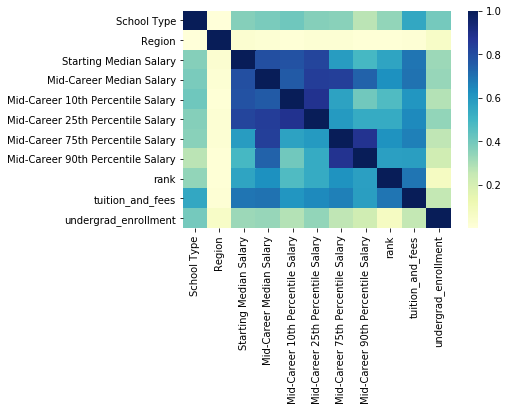

In [23]:
sns.heatmap(all_info.corr()**2, cmap="YlGnBu")

## Machine Learning

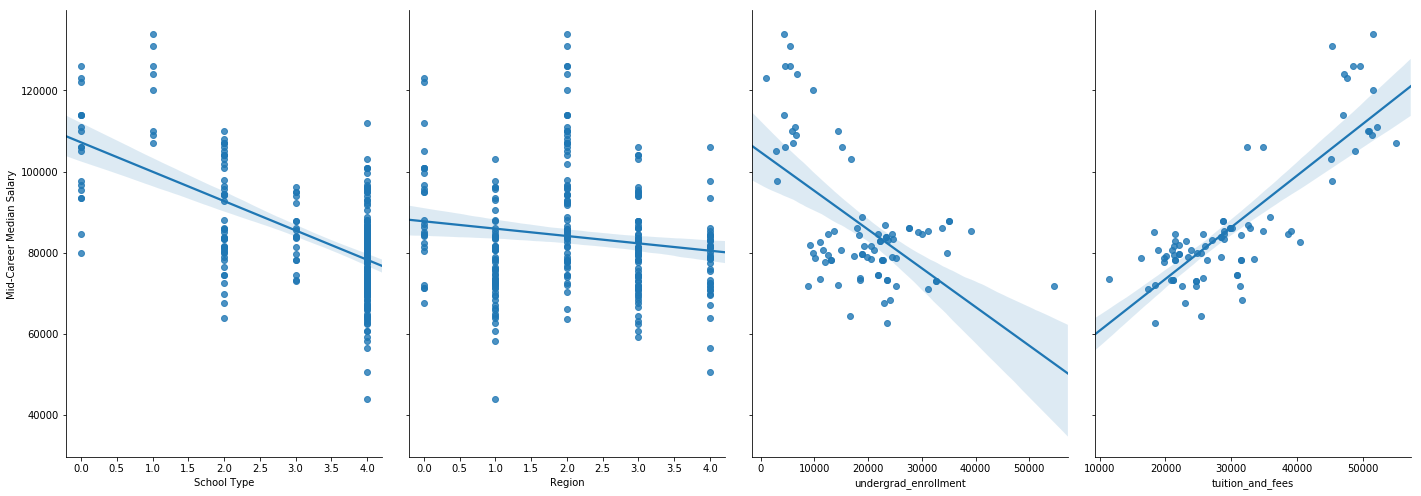

In [24]:
sns.pairplot(all_info, x_vars=['School Type', 'Region', 'undergrad_enrollment', 'tuition_and_fees'], y_vars='Mid-Career Median Salary', size=7, aspect=0.7, kind='reg')

### Normalize Data

In [70]:
# select needed data
all_needed_feature = all_info[['School Type','Region', 'Starting Median Salary','Mid-Career Median Salary']]
rank_needed_feature = rank_dp[['School Type','Region','Starting Median Salary', 'Mid-Career Median Salary', 'rank', 'tuition_and_fees', 'undergrad_enrollment']]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
feature_list = list(all_needed_feature.columns)
rank_feature_list = list(rank_needed_feature.columns)
# test_list = 

all_feature_data_scale = scaler.fit_transform(all_needed_feature)
all_needed_feature = pd.DataFrame(all_feature_data_scale, index=all_needed_feature.index)
all_needed_feature.columns = feature_list

rank_needed_feature_scale = scaler.fit_transform(rank_needed_feature)
rank_needed_feature = pd.DataFrame(rank_needed_feature_scale, index=rank_needed_feature.index)
rank_needed_feature.columns = rank_feature_list

rank_needed_feature

,School Type,Region,Starting Median Salary,Mid-Career Median Salary,rank,tuition_and_fees,undergrad_enrollment
0,0.00,0.50,0.913613,0.887955,0.027397,0.848716,0.065892
1,0.00,0.00,1.000000,0.845938,0.050228,0.828672,0.000000
5,0.00,0.50,0.620419,0.719888,0.269406,0.815316,0.061631
6,0.00,0.50,0.641361,0.677871,0.105023,0.930910,0.101902
7,0.00,0.50,0.623037,0.663866,0.173516,0.902435,0.090877
8,0.00,0.75,0.549738,0.607843,0.150685,0.481090,0.264258
9,0.00,1.00,0.544503,0.607843,0.369863,0.536618,0.067405
10,0.00,0.50,0.609948,0.593838,0.319635,0.857558,0.034983
11,0.00,0.25,0.489529,0.492997,0.465753,0.774540,0.037188
16,0.00,0.50,0.303665,0.308123,0.484018,0.622294,0.216886


# Feature

In [72]:
from sklearn.feature_selection import VarianceThreshold
sel = VarianceThreshold()
sel.fit_transform(all_feature_data)
rank_needed_select_feature = rank_feature_data[['Starting Median Salary','tuition_and_fees', 'undergrad_enrollment']]
sel.fit_transform(rank_needed_select_feature)

array([[0.91361257, 0.84871601, 0.06589176],
       [1.        , 0.82867157, 0.        ],
       [0.62041885, 0.81531624, 0.06163104],
       [0.64136126, 0.93090967, 0.10190238],
       [0.62303665, 0.90243511, 0.09087681],
       [0.54973822, 0.4810895 , 0.26425848],
       [0.54450262, 0.53661833, 0.06740544],
       [0.60994764, 0.85755847, 0.03498281],
       [0.4895288 , 0.77454012, 0.03718792],
       [0.30366492, 0.622294  , 0.21688593],
       [0.23298429, 0.30689758, 0.1644491 ],
       [0.2565445 , 0.39545965, 0.63615638],
       [0.2565445 , 0.39545965, 0.63615638],
       [0.17801047, 0.42244519, 0.49607565],
       [0.17801047, 0.42244519, 0.49607565],
       [0.19371728, 0.38966394, 0.41777545],
       [0.19371728, 0.38966394, 0.41777545],
       [0.10732984, 0.24303026, 0.33233667],
       [0.10732984, 0.24303026, 0.33233667],
       [0.11780105, 0.45863973, 0.22486545],
       [0.11780105, 0.45863973, 0.22486545],
       [0.15183246, 0.22974366, 0.40172298],
       [0.

### Spliting Data

In [43]:
all_feature_data = all_needed_feature[['School Type','Region', 'Starting Median Salary']]
all_test_data = all_needed_feature[['Mid-Career Median Salary']]
rank_feature_data = rank_needed_feature[['School Type','Region','Starting Median Salary', 'rank', 'tuition_and_fees', 'undergrad_enrollment']]
rank_test_data = rank_needed_feature[['Mid-Career Median Salary']]

In [44]:
all_train_feature, all_test_feature, all_train_outcomes, all_test_outcomes = train_test_split(all_feature_data, all_test_data, test_size = 0.2)    


In [45]:
print(all_train_feature.shape)
print(all_test_feature.shape)
print(all_train_outcomes.shape)
print(all_test_outcomes.shape)

(214, 3)
(54, 3)
(214, 1)
(54, 1)


In [46]:
lr = LinearRegression()
lr.fit(all_train_feature, all_train_outcomes)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [47]:
print(lr.intercept_)
print(lr.coef_)

[0.27817285]
[[-0.06722339 -0.01588016  0.83581698]]


In [48]:
salary_pred = lr.predict(all_test_feature)
all_test_outcomes['pred'] = salary_pred
all_test_outcomes = all_test_outcomes.sort_values(by=['Mid-Career Median Salary'])
prediction_trace_list = []
prediction_trace_list.append(go.Scatter(x=all_test_outcomes['Mid-Career Median Salary'], y=all_test_outcomes['pred'], mode = 'markers', name='prediction'))
prediction_trace_list.append(go.Scatter(x=all_test_outcomes['Mid-Career Median Salary'], y=all_test_outcomes['Mid-Career Median Salary'], name='acutal'))
layout = go.Layout(
    title='Salary Prediction without Rank',
    xaxis = dict(title = 'Actual Data'),
    yaxis = dict(title = 'Prediction'),
#     mode = 'markers'
)
fig = go.Figure(data=prediction_trace_list, layout=layout)
py.offline.iplot(fig)


/Users/zhiqilin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### Cross Validation & Grid Search

#### Cross Validation


In [54]:
# Cross validation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
folds = KFold(n_splits = 10, shuffle=True)
np.mean(cross_val_score(lr, all_train_feature, all_train_outcomes, cv = folds))


0.7628742381646179

In [55]:

# Grid-search
from sklearn.model_selection import GridSearchCV
params= {"n_estimators": [10,20,30], "max_features": ["auto", "sqrt", "log2"], "min_samples_split": [2,4,8], "bootstrap": [True, False]}
grid_search = GridSearchCV(lr, param_grid = params, cv = folds, return_train_score=True)

In [50]:
rank_train_feature, rank_test_feature, rank_train_outcomes, rank_test_outcomes = train_test_split(rank_feature_data, rank_test_data, test_size = 0.2)
print(rank_train_feature.shape)
print(rank_test_feature.shape)
print(rank_train_outcomes.shape)
print(rank_test_outcomes.shape)
lr = LinearRegression()
lr.fit(rank_train_feature, rank_train_outcomes)


(66, 6)
(17, 6)
(66, 1)
(17, 1)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [51]:
salary_rank_pred = lr.predict(rank_test_feature)
rank_test_outcomes['pred'] = salary_rank_pred
rank_test_outcomes = rank_test_outcomes.sort_values(by=['Mid-Career Median Salary'])
rank_prediction_trace_list = []
rank_prediction_trace_list.append(go.Scatter(x=rank_test_outcomes['Mid-Career Median Salary'], y=rank_test_outcomes['pred'], mode = 'markers', name='prediction'))
rank_prediction_trace_list.append(go.Scatter(x=rank_test_outcomes['Mid-Career Median Salary'], y=rank_test_outcomes['Mid-Career Median Salary'], name='acutal'))
layout = go.Layout(
    title='Salary Prediction with Rank',
    xaxis = dict(title = 'Actual Data'),
    yaxis = dict(title = 'Prediction'),
#     mode = 'markers'
)
fig = go.Figure(data=rank_prediction_trace_list, layout=layout)
py.offline.iplot(fig)


/Users/zhiqilin/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



### Cross Validation & Grid Search

#### Cross Validation

In [52]:
folds = KFold(n_splits = 10, shuffle=True)
np.mean(cross_val_score(lr, rank_train_feature, rank_train_outcomes, cv = folds))

0.7406621424092423

In [53]:
params= {"n_estimators": [10,20,30], "max_features": ["auto", "sqrt", "log2"], "min_samples_split": [2,4,8], "bootstrap": [True, False]}
grid_search = GridSearchCV(lr, param_grid = params, cv = folds, return_train_score=True)